In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
class Model(nn.Module): # nn.Module을 상속받고,
    def __init__(self):
        """
        class 형태의 모델은 항상 nn.Module을 상속받아야 함
        또한 super(모델명, self).__init__()를 실행
        nn.Module을 상속받으면, "forward"라는 이름의 함수는 자동으로 실행
        """
        super(Model, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 1, bias=False)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
 
        return x

In [88]:
def true_fun(X):
    """
    fitting하려 하는 실제 함수
    """
    noise = np.random.rand(X.shape[0]) * 0.4 - 0.2

    return np.cos(1.5 * np.pi * X) + X + noise

In [14]:
def plot_results(model):
    x = np.linspace(0, 5, 100)
    input_x = torch.from_numpy(x).float().unsqueeze(1)
    plt.plot(x, true_fun(x), label = "Truth")
    plt.plot(x, model(input_x).detach().numpy(), label="Prediction")
    plt.legend(loc='lower right', fontsize=5)
    plt.xlim((0,5))
    plt.ylim((-1,5))
    plt.grid()

In [89]:
def main():
    data_x = np.random.rand(10000) * 5 # 랜덤으로 input data 생성
    model = Model()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for step in range(10000):
        batch_x = np.random.choice(data_x,32) # batch size 32로 batch sampling
        batch_x_tensor = torch.from_numpy(batch_x).float().unsqueeze(1) # 크기 32인 1차원 array를 (32,)인 tesnsor로 변환
        pred = model(batch_x_tensor) # model.forward(batch_x_tensor): input에 대한 예측값 계산

        batch_y = true_fun(batch_x)
        truth = torch.from_numpy(batch_y).float().unsqueeze(1)
        loss = F.mse_loss(pred, truth) # 예측값과 실제값간의 차이 계산: 32개 값에 대한 loss 값

        optimizer.zero_grad() # gradient 초기화

        loss.mean().backward() # 32개 loss의 평균에 대한 gradient 계산
        """
        loss.backward(retain_graph=True)로 실행하면 graph의 말단에 있는 loss를 통한 gradient 계산 이후에도 graph 중간값들이 없어지지 않음.
        loss1.backward(retain_graph=True) 실행 후 loss2.backward()를 실행하는 것 처럼 한 그래프에서 여러 loss에 대한 gradient를 계산해야할 때 사용 가능
        """

        optimizer.step() # 위에서 계산한 gradient를 통해 parameter들을 update
        """
        이 때 argument로 따로 gradient를 받지 않는데, 만약 위에서 여러 gradient를 계산했을 경우 어떤 걸로 업데이트??
        
        """ 
    
    plot_results(model)

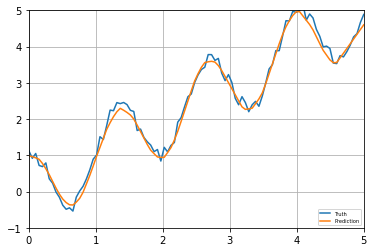

In [90]:
main()